Primeiro passo importando as bibliotecas

In [1]:
import pandas as pd
import csv #importando csv
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

- A pesquisa ficou adestrita a região do vale do Jauru

- Região vale do Jauru

        Araputanga
        Figueirópolis d'Oeste
        Glória d'Oeste
        Indiavaí
        Jauru
        Lambari d'Oeste
        Mirassol d'Oeste
        Porto Esperidião
        Reserva do Cabaçal
        Rio Branco
        Salto do Céu
        São José dos Quatro Marcos


In [2]:

cidade_link = open('src/arquivos.csv')

implementa = csv.DictReader(cidade_link)
#a leitura só funcionara com os parametros abaixo com o parametro acimas

for inplemente in implementa:
    #lendo arquivo python para rastrear o separador
    carregar_separador = open(inplemente['link'],encoding='ISO-8859-1')
    separa = csv.Sniffer().sniff(carregar_separador.read())
    separador = separa.delimiter
    print("Tipo de separador definido foi --> ", separador)
    #---------------------------------------
    #dividindo municipio para colocar na variavel de nome    
    dividi_municipio = inplemente['municipio'].split(' ')# o codigo dividi o nome do municipio
    #----------------------------------------------
    
    # Carregando csv no pandas 
    servidores = pd.read_csv(inplemente['link']#chama o arquivo csv 
                             ,sep=separador #informa o separador do arquivo
                             ,encoding='ISO-8859-1', #informa a codificação do arquivo
                             error_bad_lines=False,
                             engine='python') #trata os erros nas linhas
    nome_variavel = 'servidores_{}'.format(dividi_municipio[0])     #alterando o nome da variavel
    globals()[nome_variavel] = servidores
    globals()[nome_variavel]['Municipio'] = inplemente['municipio']
    print(nome_variavel)
    print('-------------------------')



Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
----------------------

- foi necessario criar uma variavel com todos os servidores dos municipios da região oeste

In [3]:
servidores_municipio_região_oeste = servidores_Lambari, servidores_Indiavaí, servidores_Jauru, servidores_Mirassol, servidores_Porto, servidores_Reserva, servidores_São, servidores_Figueirópolis,servidores_Salto, servidores_Rio, servidores_Gloria, servidores_Araputanga

In [4]:
resultado = pd.concat(servidores_municipio_região_oeste)
#salvando os dados dos servidores da região oeste em CSV
resultado.to_csv('servidores_selecionado.csv')

In [5]:
#exibindo os dados referente a região oeste 
resultado.head()

,Detalhe,Referência,Matrícula,Data Desligamento,Tipo de Contrato,Vínculo,Nome,Cargo,Cargo inicial,Proventos,Descontos,Líquido,Divisão,Subdivisão,Unidade,Categoria Funcional,Data Prevista Termino Contrato,Municipio,Data Admissão
0,NaN,Folha Mensal - Maio,195.0,NaN,Efetivo,Servidor Público Efetivo,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,"2.385,40","279,31","2.106,09",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
1,NaN,Folha Mensal - Maio,1810.0,NaN,Efetivo,Servidor Público Efetivo,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,"3.215,66","708,42","2.507,24",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
2,NaN,Folha Mensal - Maio,2.0,NaN,Efetivo,Servidor Público Efetivo,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,"2.956,45","409,31","2.547,14",SEC. MUN. DE INFRA ESTRUTURA,DPTO DE VIACAO E OBRAS,MANUT.ENC. SEC MUN. DE INFRA ESTRUTURA-EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
3,NaN,Folha Mensal - Maio,267.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,"1.600,00","134,97","1.465,03",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAN.PROG. AGENTES COMUNIT DE SAUDE-PACS - CONT...,CONTRATADO,NaN,Lambari D'Oeste,NaN
4,NaN,Folha Mensal - Maio,2318.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,"772,58","57,94","714,64",SEC. MUN. DE EDUCACAO E CULTURA,FUNDEB,MANUT. FUNDEB 60% CONTRATADO,CONTRATADO,NaN,Lambari D'Oeste,NaN


In [6]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
resultado.head()

,Nome,Cargo,Cargo inicial,Municipio
0,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,Lambari D'Oeste
1,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,Lambari D'Oeste
2,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,Lambari D'Oeste
3,ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,Lambari D'Oeste
4,ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,Lambari D'Oeste


# Objetivo
- Baixar dados do auxilio de forma descentralizada

#### FONTE DE DADOS
- SITE BRASIL IO 
* https://brasil.io/dataset/govbr/auxilio_emergencial/

#### METODO
- baixar os dados por municipios e salvar
- **DIFICULDADES**
    - O ARQUIVO VINHA COM MASCARA ENTÃO ORDENOU POR NUMERO PARA IMPLEMENTAR UMA BUSCA COM O FOR 

Implementando codigo para unir dados baixados do site brasil io

In [7]:
for i in range(1,12):
    print('df'+str(i))
    df = pd.read_csv("src/dados_brasil_io/govbr-{}.csv".format(i))
    nome_variavel = 'df{}'.format(i)
    globals()[nome_variavel] = df

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11


**Unindo os dataframes**

In [8]:
auxilio_emergencial = df1, df2, df3, df4, df5, df6, df7, df8, df9, df10 ,df11
auxilio_emergencial_vale_jauru = pd.concat(auxilio_emergencial)

In [9]:
auxilio_emergencial_vale_jauru

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,beneficiario,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,202004,MT,Rio Branco,NaN,***923871**,ZENAIDE VITTORAZZI RIOS,-2,NaN,NaN,EXTRA CADUN,1,1200.0
1296,202004,MT,Rio Branco,2.041920e+10,***364651**,ZENILDA MARQUES DE OLIVEIRA,20419196956,***364651**,ZENILDA MARQUES DE OLIVEIRA,BOLSA FAMILIA,1,600.0
1297,202004,MT,Rio Branco,2.041919e+10,***969521**,ZILDA ANDRADE DE ASSIS,20419186373,***969521**,ZILDA ANDRADE DE ASSIS,BOLSA FAMILIA,1,1200.0
1298,202004,MT,Rio Branco,2.092871e+10,***295061**,ZILDA SANTOS DE OLIVEIRA,-2,NaN,NaN,CADUN NAO BOLSA,1,600.0


In [10]:
auxilio_emergencial_vale_jauru = auxilio_emergencial_vale_jauru.rename(columns={'beneficiario':'Nome'})
auxilio_emergencial_vale_jauru.head()

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,Nome,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0


In [11]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
auxilio_emergencial_vale_jauru_trat =auxilio_emergencial_vale_jauru[['municipio', 'cpf_beneficiario', 'enquadramento', 'Nome']]

In [12]:
ser_rec_aux = auxilio_emergencial_vale_jauru_trat.merge(resultado, on='Nome')

In [13]:
ser_rec_aux.head(60)

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
2,Indiavaí,***692341**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
3,São José dos Quatro Marcos,***553991**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
4,São José dos Quatro Marcos,***791901**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
5,São José dos Quatro Marcos,***867011**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
6,Mirassol d'Oeste,***804311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
7,Jauru,***107941**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
8,Jauru,***964311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
9,Lambari D'Oeste,***039574**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu


In [14]:
ser_rec_aux.to_csv('servidores_auxilio.csv')

# Observações
- Conforme observa-se na busca há servidores que tem mesmo nome (homonimos) em diversas Unidade Gestoras dessa forma faz-se necessario fazer uma comparação no mesmo municipio.
- tem como objetivo isolar servidores pelo municipio que mesmo recebeu o auxilio e assim poder realmente comparar.
- Há formula abaixo não evita homonimos mas minimiza 

In [15]:
# Abreviatura
# ser_rec_aux_mun  = Servidores que receberan Auxilio Emergencial por municipio
ser_rec_aux_mun = ser_rec_aux[ser_rec_aux['municipio'] == ser_rec_aux['Municipio']]
ser_rec_aux_mun.head()


,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [16]:
ser_rec_aux_mun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 254
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         139 non-null    object
 1   cpf_beneficiario  139 non-null    object
 2   enquadramento     139 non-null    object
 3   Nome              139 non-null    object
 4   Cargo             139 non-null    object
 5   Cargo inicial     139 non-null    object
 6   Municipio         139 non-null    object
dtypes: object(7)
memory usage: 8.7+ KB


In [17]:
ser_rec_aux_mun.head()

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [18]:
dados_municipio = ser_rec_aux_mun['Municipio'].str.get_dummies().sum().sort_values(ascending=False)

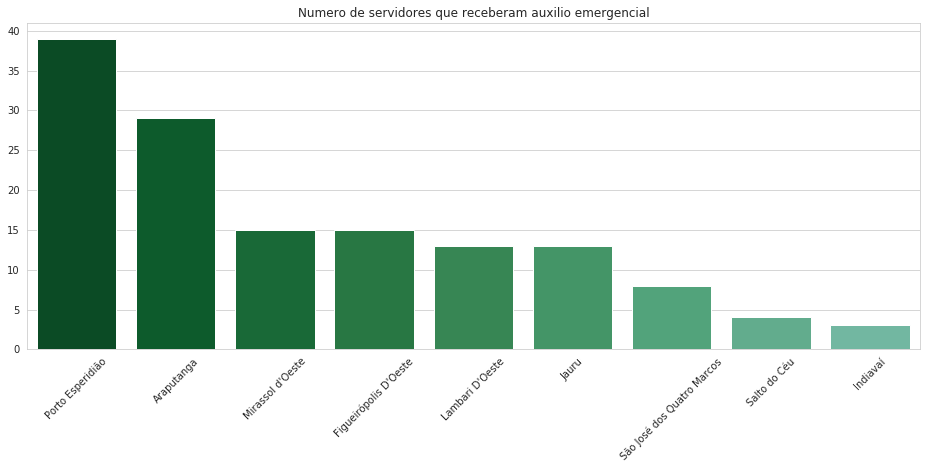

In [41]:
sns.set_style('whitegrid')# Adciona o grid ao fundo
plt.figure(figsize=(16, 6))#Coloca o tamanho da figura 
plt.xticks(rotation=45)#rotacionado ticks a 45 grau desafio 01 aula 02

sns.barplot(x=dados_municipio.index,
            y=dados_municipio.values,
           palette=sns.color_palette('BuGn_r', n_colors=len(dados_municipio)+8))#cor da palete

plt.title("Numero de servidores que receberam auxilio emergencial")
plt.show()

# _________________________________________
## Objetivo pegar os dados dos municipios com base nos nomes registrados no TCE-MT e do IPEA 
- NÃO FOI ENCONTRADO NENHUMA BASE DE DADOS ONDE E POSSIVEL CORRELACIONAR O CODIGO DO IBGE COM OS DADOS DOS CODIGOS DO TCE.
- TODAVIA É POSSIVEL ISOLAR A AREA PELO NOME DO TCE E CRIAR UMA TABELA DE CORRELAÇÃO PELO NOME
    - Metodo - implementar correlação somente para região oeste, assimm buscou dados de correlação de região sendo possivel achalas no site do IPEA no site:https://www.ipea.gov.br/ipeageo/bases.html
        - baixei os dados referente ao estado de Mato Grosso - MT em formato excel
    - Para pegar os nomes cadastrado no site do Tribunal de Contas do Estado de Mato Grosso, a busca deu-se no link https://servicos.tce.mt.gov.br/tabela-interna
        - Baixei as tabelas:
            - ***MUNICIPIO_MT*** - Cadastro dos municipios de Mato Grosso
            - ***TIPO_ENTIDADE*** - cadastro de tipo de unidade Gestora
            - ***UG*** - Unidades Gestoras Cadastradas
            

In [20]:
# Carregando e exibindo dados dos Municipios de Mato Grosso (MT)
df_municiopios_mt = pd.read_csv('src/dados_tce_mt/APLIC/MUNICIPIO_MT.csv', sep=';')
df_municiopios_mt.head()

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
0,510010,ACORIZAL,MT,344,5399.0,"846,36",2.0,5100102.0,ACORIZANO,6.3,39790.0,ACORIZAL,NaN,90018,130100,7.0
1,510020,AGUA BOA,MT,345,25721.0,"7510,61",4.0,5100201.0,AGUA-BOENSE,3.1,553164.0,ÁGUA BOA,NaN,91910,130103,2.0
2,510025,ALTA FLORESTA,MT,346,51782.0,"8976,31",4.0,5100250.0,ALTA-FLORESTENSE,5.6,783132.0,ALTA FLORESTA,NaN,89877,130106,10.0
3,510030,ALTO ARAGUAIA,MT,347,19044.0,"5514,51",3.0,5100300.0,ARAGUAIANO,3.2,697331.0,ALTO ARAGUAIA,NaN,90050,130101,3.0
4,510035,ALTO BOA VISTA,MT,348,6822.0,"2240,45",2.0,5100359.0,ALTO BOA VISTENSE,2.7,56101.0,ALTO BOA VISTA,NaN,1279,130103,1.0


In [21]:
# Carregando dados de Mato grosso 
# -----------Comentarios necessarios---------------
# - Tabelas Excel normamente vem com abas nomeada assim foi necessario verificar a que melhor atendia aos
#   quesistos a ser levantado esse nome é lançado no campo sheet_name
#---------------------------------------------------
df_dados_ipea = pd.read_excel('src/dados_ipea/MT_Mun97_region.xls', sheet_name='PIB  municipal (2010)')
df_dados_ipea 

,Código IBGE do Município,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome das Grandes Regiões,Código IBGE da Mesoregião,Nome da Mesoregião,Código IBGE da Microregião,Nome da Microregião,Impostos sobre produtos líquidos de subsídios a preços correntes,PIB a preços correntes,PIB per capita a preços correntes,Valor adicionado bruto da agropecuária a preços correntes,Valor adicionado bruto da indústria a preços correntes,Valor adicionado bruto dos serviços a preços correntes
0,510010,51,MT,Centro-Oeste,5104,Centro-Sul Mato-grossense,51016,Rosßrio Oeste,2777,51865,9402.66,22385,3736,22967
1,510020,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51010,Canarana,51299,418944,20099.00,88960,50791,227894
2,510025,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51002,Alta Floresta,62146,690143,14017.89,165223,100192,362582
3,510030,51,MT,Centro-Oeste,5105,Sudeste Mato-grossense,51022,Alto Araguaia,126461,1163457,74247.43,104460,485334,447202
4,510035,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51009,Norte Araguaia,2951,57908,11032.19,24353,4721,25884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,510860,51,MT,Centro-Oeste,5102,Nordeste Mato-grossense,51009,Norte Araguaia,19291,291373,13613.65,104434,35915,131734
137,510880,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51003,ColÝder,3070,55659,11292.11,24606,3575,24408
138,510885,51,MT,Centro-Oeste,5104,Centro-Sul Mato-grossense,51015,Alto Paraguai,5142,61051,20872.11,19120,17245,19545
139,510890,51,MT,Centro-Oeste,5101,Norte Mato-grossense,51005,Arinos,12431,186278,28266.83,103962,14644,55240


In [22]:
#tratando e selecionando somente os dadnos necessarios da tabela do IPEA
df_dados_ipea = df_dados_ipea[['Código IBGE do Município', 'Código IBGE da Microregião','Nome da Microregião']]
df_dados_ipea

,Código IBGE do Município,Código IBGE da Microregião,Nome da Microregião
0,510010,51016,Rosßrio Oeste
1,510020,51010,Canarana
2,510025,51002,Alta Floresta
3,510030,51022,Alto Araguaia
4,510035,51009,Norte Araguaia
...,...,...,...
136,510860,51009,Norte Araguaia
137,510880,51003,ColÝder
138,510885,51015,Alto Paraguai
139,510890,51005,Arinos


In [23]:
#selecionando dados do vale do Jauru
df_dados_ipea = df_dados_ipea[df_dados_ipea['Nome da Microregião']== 'Jauru']
df_dados_ipea

,Código IBGE do Município,Código IBGE da Microregião,Nome da Microregião
11,510125,51014,Jauru
43,510380,51014,Jauru
46,510395,51014,Jauru
49,510450,51014,Jauru
56,510500,51014,Jauru
61,510523,51014,Jauru
67,510562,51014,Jauru
96,510682,51014,Jauru
101,510710,51014,Jauru
102,510715,51014,Jauru


In [24]:
df_dados_ipea = df_dados_ipea.rename(columns={'Código IBGE do Município':'MUN_CODIGO'})
df_dados_ipea

,MUN_CODIGO,Código IBGE da Microregião,Nome da Microregião
11,510125,51014,Jauru
43,510380,51014,Jauru
46,510395,51014,Jauru
49,510450,51014,Jauru
56,510500,51014,Jauru
61,510523,51014,Jauru
67,510562,51014,Jauru
96,510682,51014,Jauru
101,510710,51014,Jauru
102,510715,51014,Jauru


In [25]:
df_municiopios_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MUN_CODIGO               143 non-null    int64  
 1   MUN_NOME                 143 non-null    object 
 2   UF_SIGLA                 143 non-null    object 
 3   ID_IBGE                  143 non-null    int64  
 4   POPULACAO                141 non-null    float64
 5   TERRITORIO               141 non-null    object 
 6   GRUPO_POPULACAO          141 non-null    float64
 7   CODIGO_DO_IBGE           141 non-null    float64
 8   GENTILICO                141 non-null    object 
 9   DENSIDADE_DEMOGRAFICA    141 non-null    float64
 10  SERIE_REVISADA           141 non-null    float64
 11  MUN_NOME_ORIGINAL        141 non-null    object 
 12  COMPATIBILIDADE_RF       2 non-null      object 
 13  CODIGO_DA_RF_01          143 non-null    int64  
 14  CODIGO_DA_RF_02          1

In [26]:
df_dados_ipea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 11 to 116
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   MUN_CODIGO                  12 non-null     int64 
 1   Código IBGE da Microregião  12 non-null     int64 
 2   Nome da Microregião         12 non-null     object
dtypes: int64(2), object(1)
memory usage: 384.0+ bytes


In [27]:
#df_municiopios_mt['MUN_CODIGO'] = df_municiopios_mt['MUN_CODIGO'].fillna(0.0).astype(int)
#df_municiopios_mt.info()

In [28]:
df_municiopios_mt.head()

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
0,510010,ACORIZAL,MT,344,5399.0,"846,36",2.0,5100102.0,ACORIZANO,6.3,39790.0,ACORIZAL,NaN,90018,130100,7.0
1,510020,AGUA BOA,MT,345,25721.0,"7510,61",4.0,5100201.0,AGUA-BOENSE,3.1,553164.0,ÁGUA BOA,NaN,91910,130103,2.0
2,510025,ALTA FLORESTA,MT,346,51782.0,"8976,31",4.0,5100250.0,ALTA-FLORESTENSE,5.6,783132.0,ALTA FLORESTA,NaN,89877,130106,10.0
3,510030,ALTO ARAGUAIA,MT,347,19044.0,"5514,51",3.0,5100300.0,ARAGUAIANO,3.2,697331.0,ALTO ARAGUAIA,NaN,90050,130101,3.0
4,510035,ALTO BOA VISTA,MT,348,6822.0,"2240,45",2.0,5100359.0,ALTO BOA VISTENSE,2.7,56101.0,ALTO BOA VISTA,NaN,1279,130103,1.0


In [29]:
df_municiopios_mt[df_municiopios_mt['MUN_NOME'] == 'JAURU']

,MUN_CODIGO,MUN_NOME,UF_SIGLA,ID_IBGE,POPULACAO,TERRITORIO,GRUPO_POPULACAO,CODIGO_DO_IBGE,GENTILICO,DENSIDADE_DEMOGRAFICA,SERIE_REVISADA,MUN_NOME_ORIGINAL,COMPATIBILIDADE_RF,CODIGO_DA_RF_01,CODIGO_DA_RF_02,CODIGO_MUNICIPIO_REGIAO
54,510500,JAURU,MT,400,8793.0,"1301,89",3.0,5105002.0,JAURUENSE,7.1,132866.0,JAURU,NaN,89915,130109,4.0


In [30]:
df_municipios_com_id = df_municiopios_mt.merge(df_dados_ipea, on='MUN_CODIGO')

In [31]:
df_municipios_com_id = df_municipios_com_id[['MUN_CODIGO', 'Nome da Microregião','MUN_NOME', 'GENTILICO']]
df_municipios_com_id.head()

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE
1,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE
2,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE
3,510450,Jauru,INDIAVAI,INDIAVAIENSE
4,510500,Jauru,JAURU,JAURUENSE


In [32]:
df_ug_tce = pd.read_csv('src/dados_tce_mt/APLIC/UG.csv', sep=';')
df_ug_tce.head(60)

,NOME_ENTIDADE,CNPJ_CPF_COD_TCE_ENTIDADE,CNPJ_DIREITO_PUBLICO,ATIVO,ESFERA,PREVIDENCIA
0,1123959,CAMARA MUNICIPAL DE BOM JESUS DO ARAGUAIA,S,N,4.235199e+12,M
1,1116391,FUNDO DE APERFEICOAMENTO DOS SERVICOS JURIDICO...,S,N,3.340940e+11,E
2,1116615,PREFEITURA MUNICIPAL DE ALTO TAQUARI,S,N,1.362680e+12,M
3,1116623,CAMARA MUNICIPAL DE MIRASSOL DOESTE,S,N,3.756178e+12,M
4,1116698,CAMARA MUNICIPAL DE ALTO ARAGUAIA,S,N,1.362664e+12,M
5,1116946,FUNDO DE DESENVOLVIMENTO INDUSTRIAL E COMERCIAL,S,N,1.323697e+13,E
6,1117324,PREFEITURA MUNICIPAL DE NOVA SANTA HELENA,S,N,4.214704e+12,M
7,1117332,CAMARA MUNICIPAL DE SAO FELIX DO ARAGUAIA,S,N,1.505145e+13,M
8,1117340,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DE SANTO...,S,S,1.260655e+13,M
9,1117373,CAMARA MUNICIPAL DE NOVA SANTA HELENA,S,N,4.214699e+12,M


In [33]:
dados_jose = pd.read_excel('src/dados_tce_mt/Leandro DSA.xlsx')
dados_jose

,ENT_CODIGO,ENT_NOME,MUN_CODIGO
0,1115237,PREFEITURA MUNICIPAL DE NOVO SANTO ANTONIO,510631
1,1111129,PREFEITURA MUNICIPAL DE NOVA MARINGA,510890
2,1112168,PREFEITURA MUNICIPAL DE VARZEA GRANDE,510840
3,1112176,PREFEITURA MUNICIPAL DE PLANALTO DA SERRA,510645
4,1112754,PREFEITURA MUNICIPAL DE GAUCHA DO NORTE,510385
...,...,...,...
515,1158930,TESOURO DO ESTADO DE MATO GROSSO,510340
516,1159276,FUNDACAO MUNICIPAL DE SAUDE PREFEITO SAMUEL GR...,510562
517,1159573,GOVERNADORIA,510340
518,1159581,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...,510490


In [34]:
selecionando_municipios = df_municipios_com_id.merge(dados_jose, on='MUN_CODIGO')
selecionando_municipios

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO,ENT_CODIGO,ENT_NOME
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121375,PREFEITURA MUNICIPAL DE ARAPUTANGA
1,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121367,CAMARA MUNICIPAL DE ARAPUTANGA
2,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1120732,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DE ARAPU...
3,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1128727,PREFEITURA MUNICIPAL DE FIGUEIROPOLIS DOESTE
4,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1112762,CAMARA MUNICIPAL DE FIGUEIROPOLIS DOESTE
5,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1159557,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...
6,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1134550,CAMARA MUNICIPAL DE GLORIA DOESTE
7,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1126127,PREFEITURA MUNICIPAL DE GLORIA DOESTE
8,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1159441,FUNDO MUNICIPAL DE PREVIDENCIA SOCIAL DOS SERV...
9,510450,Jauru,INDIAVAI,INDIAVAIENSE,1125004,PREFEITURA MUNICIPAL DE INDIAVAI


In [35]:
#isolando somente as prefeituras
prefeitura_nome = []
for x in selecionando_municipios['ENT_NOME']:
    prefeitura = x.count('PREFEITURA')
    if prefeitura != 0:
        #print(x)
        prefeitura_nome.append(x)
            
prefeitura_nome
prefeituras = pd.DataFrame(prefeitura_nome,columns=['ENT_NOME'])

In [36]:
seleciona_prefeitura = selecionando_municipios.merge(prefeituras, on='ENT_NOME')
seleciona_prefeitura

,MUN_CODIGO,Nome da Microregião,MUN_NOME,GENTILICO,ENT_CODIGO,ENT_NOME
0,510125,Jauru,ARAPUTANGA,ARAPUTANGUENSE,1121375,PREFEITURA MUNICIPAL DE ARAPUTANGA
1,510380,Jauru,FIGUEIROPOLIS DOESTE,FIGUEIROPOLENSE,1128727,PREFEITURA MUNICIPAL DE FIGUEIROPOLIS DOESTE
2,510395,Jauru,GLORIA DOESTE,GLORIENSES-DO-OESTE,1126127,PREFEITURA MUNICIPAL DE GLORIA DOESTE
3,510450,Jauru,INDIAVAI,INDIAVAIENSE,1125004,PREFEITURA MUNICIPAL DE INDIAVAI
4,510500,Jauru,JAURU,JAURUENSE,1111418,PREFEITURA MUNICIPAL DE JAURU
5,510523,Jauru,LAMBARI DOESTE,LAMBARIENSES,1127323,PREFEITURA MUNICIPAL DE LAMBARI DOESTE
6,510562,Jauru,MIRASSOL DOESTE,MIRADOLENSE,1113521,PREFEITURA MUNICIPAL DE MIRASSOL DOESTE
7,510682,Jauru,PORTO ESPERIDIAO,PORTENSE,1125152,PREFEITURA MUNICIPAL DE PORTO ESPERIDIAO
8,510710,Jauru,SAO JOSE DOS QUATRO MARCOS,QUATRO-MARQUENSE,1119528,PREFEITURA MUNICIPAL DE SAO JOSE DOS QUATRO MA...
9,510715,Jauru,RESERVA DO CABACAL,RESERVENSE,1125145,PREFEITURA MUNICIPAL DE RESERVA DO CABACAL


# Implementando busca automatizada no site do Tribunal de Contas do Estado de Mato Grosso na parte de pessoal 
- site: https://cidadao.tce.mt.gov.br/pessoal
- Pois lá tem parte do CPF que pode ser consultada
 <img src='src/img/Screenshot_2020-07-23 TCEMT Espaço do Cidadão - Pessoal.png'>

In [37]:
# Durante pesquisa foi possivel verificar que o Tribunal de Contas do Estado de 
# Mato Grosso tem dados de 2011 a 2020
# Solução implementar um range de 2011 a 2021
# Lembrando que python sempre le um numero  a menos que informado pois a contagem inicia em 0
ato_pessoal_tce_anos = list(range(2011,2021))
print(ato_pessoal_tce_anos)


[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [38]:
#definindo url
url = 'https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio=2011&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio=510125&ent_codigo=1121375&lotacao='

In [39]:
for x in ato_pessoal_tce_anos:
    r = requests.get('https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio={}&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio=510125&ent_codigo=1121375&lotacao='.format(x))
    print(x)
    


2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [40]:
Cabaçal,src/reserva/Portal Transp. Servidores_mes04.csv
Reserva do Cdataframetce = pd.read_html(r.text)

SyntaxError: invalid syntax (<ipython-input-40-1196abca4d53>, line 1)

In [ ]:
dataframetce[1]

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())

In [ ]:
for a in soup.find_all(class_="bt bt_azul"):
    link = a['href']
    print(link)

In [ ]:
tce_cidadão_link = 'https://cidadao.tce.mt.gov.br'+link
x = requests.get(tce_cidadão_link)

In [ ]:
soupII = BeautifulSoup(x.content, 'html.parser')

In [ ]:
atos_pessoal = soupII.find('fieldset')
dados_servidores = (atos_pessoal.getText())
print(dados_servidores)

In [ ]:
soupII.get_text()

In [ ]:
auxilio_emergencial_vale_jauru[auxilio_emergencial_vale_jauru['Nome']==  'ELIÁS BENTO ELEZIARIO JUNIOR']

In [ ]:
tce_cidadão_link